In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [87]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'


<IPython.core.display.Javascript object>

In [50]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()


<IPython.core.display.Javascript object>

In [80]:
pd.set_option("display.max_columns", None)


<IPython.core.display.Javascript object>

In [58]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]



<IPython.core.display.Javascript object>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions (1-4) after you handled the missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [72]:
# df2 = df.set_index(["STATE", "YEAR"]).sort_index()
df2 = df.copy()
# df2 = df2.sort_values(["STATE", "YEAR"]).interpolate(method="linear")
for col in fill_list:
    df2[col]=df2.groupby('STATE')[col].apply(lambda x : x.interpolate(limit_direction = "both"))
# for col in fill_list:
#     df2.groupby('STATE')[col].interpolate(limit_direction = "both"))


<IPython.core.display.Javascript object>

In [74]:
df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,121156.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,676297.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,311432.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,5129788.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
df3 = df.set_index(["STATE", "YEAR"]).sort_index()
for col in fill_list:
    df3[col] = df3[col].interpolate(method="linear")

<IPython.core.display.Javascript object>

In [78]:
p_missing = df.isna().sum() / len(df)
print(p_missing)
p_missing2 = df2.isna().sum() / len(df2)
print(p_missing2)
p_missing3 = df3.isna().sum() / len(df3)
print(p_missing3)

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

<IPython.core.display.Javascript object>

going to go with df2

In [77]:
df2 = df2.dropna() #should I do this if I'm getting rid of a lot of info due to missing avg math 4 scores etc?

<IPython.core.display.Javascript object>

## 1 ##

Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [81]:
df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,474.000000,474.000000,474.000000,474.000000,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,474.000000,474.000000,474.000000,474.000000
mean,2008.305907,9.372741e+05,1.066027e+07,9.443520e+05,4.939268e+06,4.776649e+06,1.073981e+07,5.569291e+06,3.143970e+06,4.860055e+05,1.027621e+06,22600.880802,71624.391350,72061.073840,72377.256329,64198.553797,5.798220e+05,2.843434e+05,8.868655e+05,236.541353,279.511266,219.305086,263.772645
std,6.096588,1.116386e+06,1.349093e+07,1.323201e+06,6.371508e+06,6.289604e+06,1.366273e+07,7.216198e+06,3.821114e+06,5.982040e+05,1.473734e+06,34398.045119,86560.294748,86032.057383,85378.231896,77119.042052,6.890279e+05,3.389602e+05,1.054524e+06,9.159956,9.695064,7.698038,6.834157
min,1992.000000,4.417900e+04,6.452330e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.387840e+05,3.182600e+05,1.949150e+05,2.191000e+04,1.545200e+04,0.000000,4528.000000,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,178.557612,236.379102
25%,2005.000000,2.760008e+05,2.692582e+06,2.552252e+05,1.420028e+06,9.303528e+05,2.632913e+06,1.406720e+06,8.335698e+05,1.272472e+05,2.358938e+05,3641.000000,20956.500000,20433.500000,20792.000000,18503.250000,1.658642e+05,8.163050e+04,2.592820e+05,232.062602,274.436276,215.044071,259.762432
50%,2009.000000,6.617418e+05,6.073530e+06,5.352895e+05,2.994419e+06,2.386380e+06,6.180272e+06,3.167476e+06,1.864499e+06,3.213138e+05,5.971065e+05,12795.000000,50846.000000,50773.500000,49748.500000,41073.500000,4.051395e+05,1.844455e+05,6.231180e+05,238.289254,281.369105,220.928176,265.136000
75%,2013.000000,1.014565e+06,1.216828e+07,1.019738e+06,6.086358e+06,5.358207e+06,1.155368e+07,6.090734e+06,3.610797e+06,5.606970e+05,1.034928e+06,28669.500000,79396.000000,79576.000000,80848.000000,74952.000000,6.395600e+05,3.219040e+05,9.706720e+05,242.557845,286.154375,224.488094,268.275364
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,249524.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


<IPython.core.display.Javascript object>

Federal revenue is quite a bit smaller than state revenue which is about equal to local revenue, which makes sense since schools are usually locally funded.
Average math scores are higher than average reading scores, but this doesn't mean too much since the grading scales are fairly arbitrary. 

## 2 ##
Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


In [85]:
cal_revexp = df2.loc[
    df2["STATE"] == "CALIFORNIA", ["YEAR", "TOTAL_REVENUE", "TOTAL_EXPENDITURE"]
]
cal_revexp.head()

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
213,1996,31282981.0,31561692.0
420,2000,46628207.0,45829753.0
576,2003,59815855.0,59749885.0
680,2005,62171797.0,66196072.0
784,2007,72516936.0,73225422.0


<IPython.core.display.Javascript object>

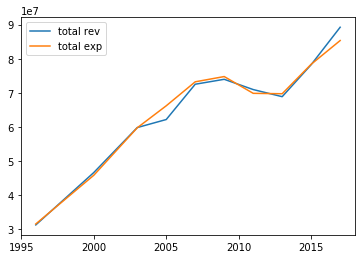

<IPython.core.display.Javascript object>

In [91]:
plt.plot(cal_revexp["YEAR"], cal_revexp["TOTAL_REVENUE"], label="total rev")
plt.plot(cal_revexp["YEAR"], cal_revexp["TOTAL_EXPENDITURE"], label="total exp")
plt.legend()
plt.show()

There's a generally increasing curve, but you can also see the effects of the Great Recession and the resulting fall in property taxes used to fund schools. Eventually there was a rebound around 2013 or so

### 3 ###
In your chosen state, which of the lessons are the students more successful, math or reading?


In [99]:
cal = df2[df2["STATE"] == "CALIFORNIA"]
cal["ScoreDiff4"] = cal["AVG_MATH_4_SCORE"] - cal["AVG_READING_4_SCORE"]
cal["ScoreDiff8"] = cal["AVG_MATH_8_SCORE"] - cal["AVG_READING_8_SCORE"]


<IPython.core.display.Javascript object>

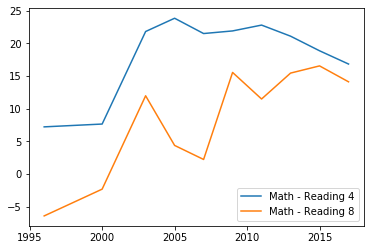

<IPython.core.display.Javascript object>

In [106]:
plt.plot(cal["YEAR"], cal["ScoreDiff4"], label="Math - Reading 4")
plt.plot(cal["YEAR"], cal["ScoreDiff8"], label="Math - Reading 8")
plt.legend()
plt.show()

Seems like they're mostly better at math. Again, this completely depends on the scale that is used to measure ability. Is the math test just easier than the reading test?? The differences do narrow as the kids get older though.

## 4 ##

What are the distributions of the math and reading scores in the sample?¶


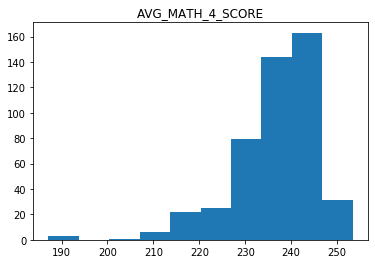

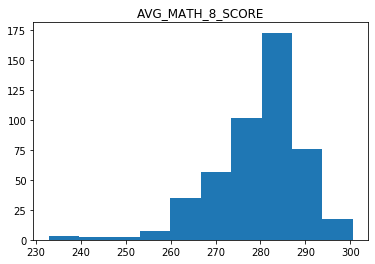

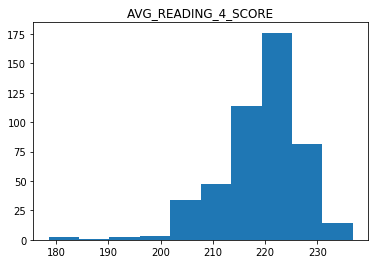

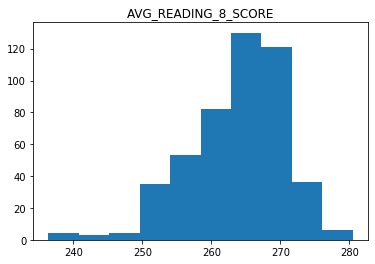

<IPython.core.display.Javascript object>

In [110]:
plt.hist(df2["AVG_MATH_4_SCORE"])
plt.title("AVG_MATH_4_SCORE")
plt.show()

plt.hist(df2["AVG_MATH_8_SCORE"])
plt.title("AVG_MATH_8_SCORE")
plt.show()

plt.hist(df2["AVG_READING_4_SCORE"])
plt.title("AVG_READING_4_SCORE")
plt.show()

plt.hist(df2["AVG_READING_8_SCORE"])
plt.title("AVG_READING_8_SCORE")
plt.show()

They all have a bit of a left-skew

## 5 ##

Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.¶


In [121]:
df3 = df.copy()
interpolate = df3[
    [
        "STATE",
        "YEAR",
        "AVG_MATH_4_SCORE",
        "AVG_MATH_8_SCORE",
        "AVG_READING_4_SCORE",
        "AVG_READING_8_SCORE",
    ]
]
score_metrics = [
    "AVG_MATH_4_SCORE",
    "AVG_MATH_8_SCORE",
    "AVG_READING_4_SCORE",
    "AVG_READING_8_SCORE",
]
states = interpolate["STATE"].unique()

<IPython.core.display.Javascript object>

In [122]:
for state in states:
    interpolate.loc[df3["STATE"] == state] = interpolate.loc[
        df3["STATE"] == state
    ].interpolate()

<IPython.core.display.Javascript object>

In [120]:
interpolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATE                1492 non-null   object 
 1   YEAR                 1492 non-null   int64  
 2   AVG_MATH_4_SCORE     1277 non-null   float64
 3   AVG_MATH_8_SCORE     1273 non-null   float64
 4   AVG_READING_4_SCORE  1250 non-null   float64
 5   AVG_READING_8_SCORE  1097 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.1+ KB


<IPython.core.display.Javascript object>

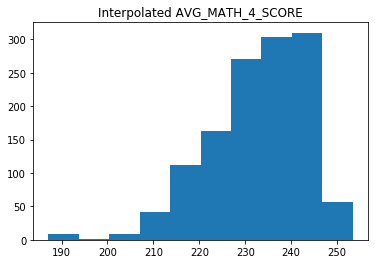

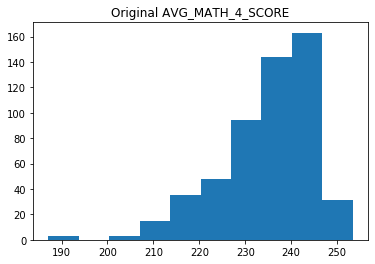

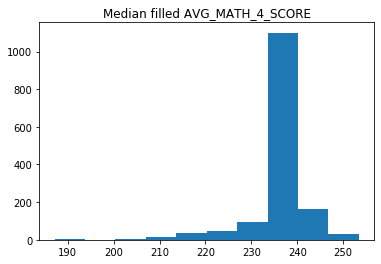

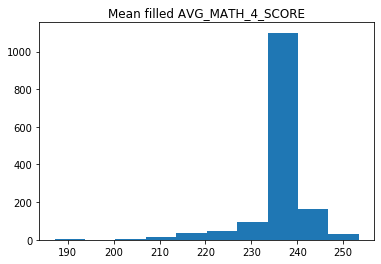

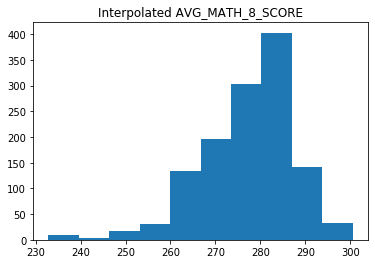

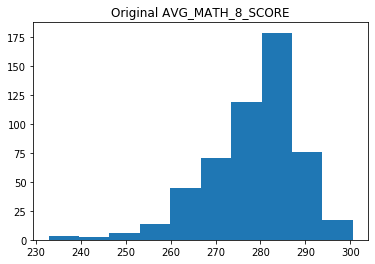

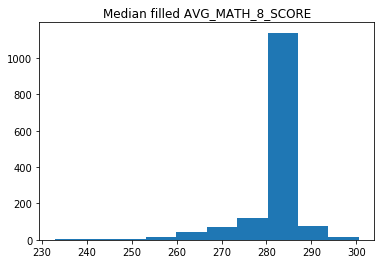

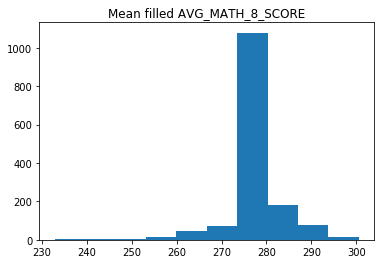

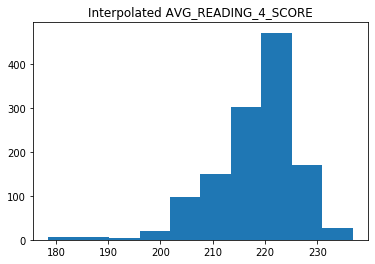

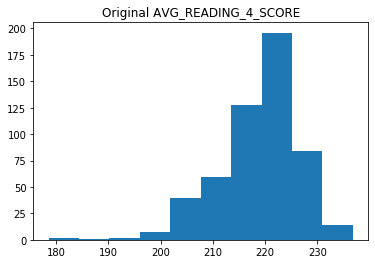

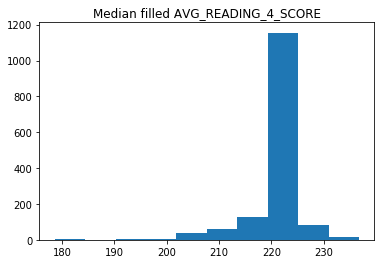

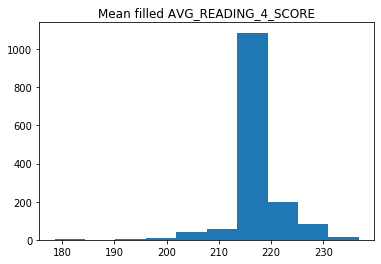

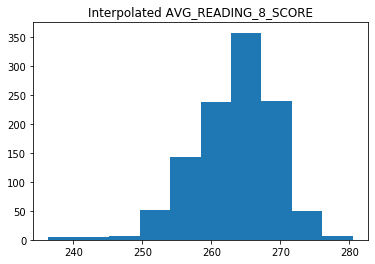

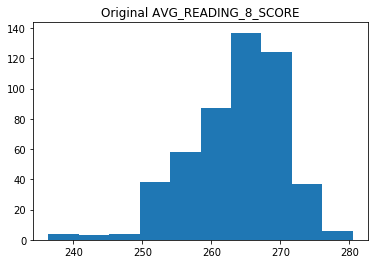

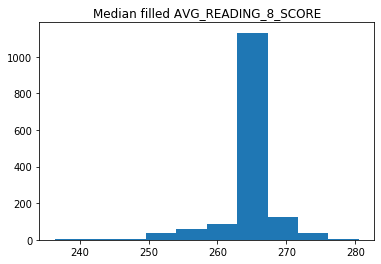

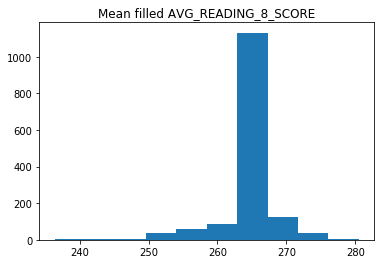

<IPython.core.display.Javascript object>

In [131]:
for metric in score_metrics:
    plt.hist(interpolate[metric])
    plt.title("Interpolated " + metric)
    plt.show()

    plt.hist(df[metric])
    plt.title("Original " + metric)
    plt.show()
    
    plt.hist(df[metric].fillna(df[metric].median()))
    plt.title("Median filled " + metric)
    plt.show()
    
    plt.hist(df[metric].fillna(df[metric].mean()))
    plt.title("Mean filled " + metric)
    plt.show()


Obviously you see these huge peaks at the median/mean hwere you filled the na values. Though it doesn't affect teh corresponding statistic, it would reduce the standard deviation and change the descriptive statistics of the subgroups. interpolation seems more natural.